### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

Osserviamo che aumentando il numero di epoche e il numero di dati con cui allenare la rete i risultati ottenuti milgiorano notevolmente (in particolare si osserva subito che se si usano pochi dati e poche epoche la retta ottenuta si allonata molto da quella desiderate). 
Il rumore applicato ai dati da analizzare rende molto meno performante la rete e per ottenere un buon fit bisogna aumentare molto il numero di epoche e di dati di training utilizzati, come si vede nel caso qui sotto: ($N_{\mathrm{epochs}}=100 \>\> N_{\mathrm{train}}=5000 \>\> \sigma=10$)

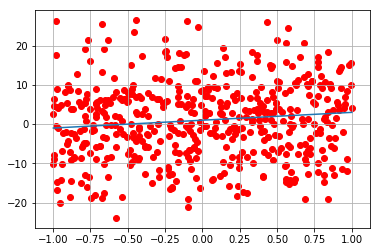

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 10 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training (red) and target dataset (blue)
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [44]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(1,)))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 500 samples
Epoch 1/100
5000/5000 [==============================] - 1s 208us/sample - loss: 98.3891 - mean_squared_error: 98.3891 - val_loss: 96.1399 - val_mean_squared_error: 96.1399
Epoch 2/100
5000/5000 [==============================] - 0s 82us/sample - loss: 98.3126 - mean_squared_error: 98.3126 - val_loss: 95.2766 - val_mean_squared_error: 95.2766
Epoch 3/100
5000/5000 [==============================] - 0s 81us/sample - loss: 98.1945 - mean_squared_error: 98.1945 - val_loss: 95.3294 - val_mean_s

Epoch 45/100
5000/5000 [==============================] - 0s 91us/sample - loss: 98.1545 - mean_squared_error: 98.1545 - val_loss: 95.6286 - val_mean_squared_error: 95.6286
Epoch 46/100
5000/5000 [==============================] - 0s 93us/sample - loss: 98.2482 - mean_squared_error: 98.2483 - val_loss: 95.8209 - val_mean_squared_error: 95.8209
Epoch 47/100
5000/5000 [==============================] - 0s 86us/sample - loss: 98.2325 - mean_squared_error: 98.2325 - val_loss: 95.3636 - val_mean_squared_error: 95.3636
Epoch 48/100
5000/5000 [==============================] - 0s 89us/sample - loss: 98.1892 - mean_squared_error: 98.1892 - val_loss: 95.4564 - val_mean_squared_error: 95.4564
Epoch 49/100
5000/5000 [==============================] - 0s 90us/sample - loss: 98.2027 - mean_squared_error: 98.2027 - val_loss: 95.5674 - val_mean_squared_error: 95.5674
Epoch 50/100
5000/5000 [==============================] - 0s 82us/sample - loss: 98.2271 - mean_squared_error: 98.2271 - val_loss: 95.2

In [45]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

500/500 [==============================] - 0s 46us/sample - loss: 95.2818 - mean_squared_error: 95.2818

Test loss: 95.2818207397461
Test accuracy: 95.28182


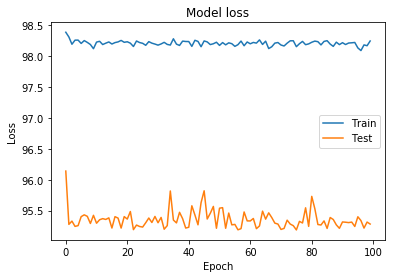

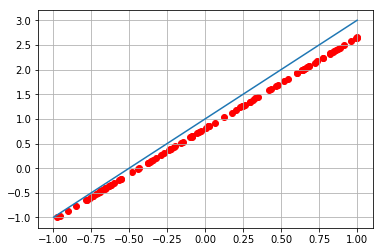

In [46]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()